In [2]:
import torch
import json
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms

You should consider upgrading via the 'pip install --upgrade pip' command.


/tf/innova_show/dataset-distillation


LICENSE          data/      requirements.txt
README.md        datasets/  results/
Untitled.ipynb   docs/      test_train_distilled_image.py
__pycache__/     log.txt    tox.ini
base_options.py  main.py    train_distilled_image.py
basics.py        networks/  utils/


In [5]:
import os
import numpy as np
import torch
from PIL import Image


class InnovaDataset(object):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        list_all = list(sorted(os.listdir(os.path.join(root))))
        self.imgs = list(i for i in list_all if ".jpg" in i)
        self.masks = list(i for i in list_all if ".json" in i)

    def get_json_record_path(self, ix):
        # return os.path.join(self.path, 'record_'+str(ix).zfill(6)+'.json')  #fill zeros
        return os.path.join(self.root, 'record_' + str(ix) + '.json')  # don't fill zeros
    
    def make_record_paths_absolute(self, record_dict):
        d = {}
        for k, v in record_dict.items():
            if type(v) == str:  # filename
                if '.' in v:
                    v = os.path.join(self.root, v)
            d[k] = v

        return d

    def get_json_record(self, ix):
        path = self.get_json_record_path(ix)
        try:
            with open(path, 'r') as fp:
                json_data = json.load(fp)
        except UnicodeDecodeError:
            raise Exception('bad record: %d. You may want to run `python manage.py check --fix`' % ix)
        except FileNotFoundError:
            raise
        except:
            logger.error('Unexpected error: {}'.format(sys.exc_info()[0]))
            raise

        record_dict = self.make_record_paths_absolute(json_data)
        return record_dict

    def get_record(self, ix):
        json_data = self.get_json_record(ix) # 返回的应该是字典对象
#         data = self.read_record(json_data)
        return json_data

    def read_record(self, record_dict):
        data = {}
        for key, val in record_dict.items():
            typ = self.get_input_type(key)

            # load objects that were saved as separate files
            if typ == 'image_array':
                img = Image.open((val))
                val = np.array(img)

            data[key] = val
        return data

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, self.imgs[idx])
#         mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
#         img = np.array(img,np.float32,copy=False)
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = self.get_record(idx)
        # convert the PIL Image into a numpy array
        label = torch.tensor(mask['user/angle'])+1
        
#         img = label
        img = np.array(img)
        return img, label

    def __len__(self):
        return len(self.imgs)

In [8]:
ls

LICENSE          data/      requirements.txt
README.md        datasets/  results/
R_1.ipynb        docs/      test_train_distilled_image.py
__pycache__/     log.txt    tox.ini
base_options.py  main.py    train_distilled_image.py
basics.py        networks/  utils/


In [3]:
# This Part is just for visualization of our dataset
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()
    
    
    
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

tensor([[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]])
torch.Size([12, 240, 440, 3])


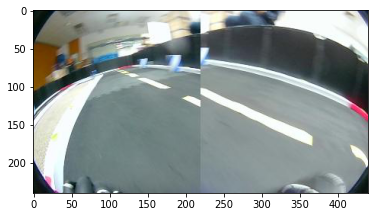

In [7]:
# get some random training images
root="./tub_2026_huanshan/"
dataset = InnovaDataset(root, transform)
data_loader = torch.utils.data.DataLoader(
 dataset, batch_size=12, shuffle=True, num_workers=1)
dataiter = iter(data_loader)
images, labels = dataiter.next()
labels = torch.nn.functional.one_hot(labels, num_classes=3)
print(labels)
print(images.shape)
plt.imshow(torch.squeeze(images[0], 0))
# show images
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
root="../tub_2026_huanshan/"
list_all = list(sorted(os.listdir(os.path.join(root))))
list_1 = list(i for i in list_all if ".jpg" in i)
list_2 = list(i for i in list_all if ".json" in i)

In [17]:
list_1[1::]

['10000_cam-image_array_.jpg',
 '10001_cam-image_array_.jpg',
 '10002_cam-image_array_.jpg',
 '10003_cam-image_array_.jpg',
 '10004_cam-image_array_.jpg',
 '10005_cam-image_array_.jpg',
 '10006_cam-image_array_.jpg',
 '10007_cam-image_array_.jpg',
 '10008_cam-image_array_.jpg',
 '10009_cam-image_array_.jpg',
 '1000_cam-image_array_.jpg',
 '10010_cam-image_array_.jpg',
 '10011_cam-image_array_.jpg',
 '10012_cam-image_array_.jpg',
 '10013_cam-image_array_.jpg',
 '10014_cam-image_array_.jpg',
 '10015_cam-image_array_.jpg',
 '10016_cam-image_array_.jpg',
 '10017_cam-image_array_.jpg',
 '10018_cam-image_array_.jpg',
 '10019_cam-image_array_.jpg',
 '1001_cam-image_array_.jpg',
 '10020_cam-image_array_.jpg',
 '10021_cam-image_array_.jpg',
 '10022_cam-image_array_.jpg',
 '10023_cam-image_array_.jpg',
 '10024_cam-image_array_.jpg',
 '10025_cam-image_array_.jpg',
 '10026_cam-image_array_.jpg',
 '10027_cam-image_array_.jpg',
 '10028_cam-image_array_.jpg',
 '10029_cam-image_array_.jpg',
 '1002_cam

In [18]:
list_2[1::]

['record_0.json',
 'record_1.json',
 'record_10.json',
 'record_100.json',
 'record_1000.json',
 'record_10000.json',
 'record_10001.json',
 'record_10002.json',
 'record_10003.json',
 'record_10004.json',
 'record_10005.json',
 'record_10006.json',
 'record_10007.json',
 'record_10008.json',
 'record_10009.json',
 'record_1001.json',
 'record_10010.json',
 'record_10011.json',
 'record_10012.json',
 'record_10013.json',
 'record_10014.json',
 'record_10015.json',
 'record_10016.json',
 'record_10017.json',
 'record_10018.json',
 'record_10019.json',
 'record_1002.json',
 'record_10020.json',
 'record_10021.json',
 'record_10022.json',
 'record_10023.json',
 'record_10024.json',
 'record_10025.json',
 'record_10026.json',
 'record_10027.json',
 'record_10028.json',
 'record_10029.json',
 'record_1003.json',
 'record_10030.json',
 'record_10031.json',
 'record_10032.json',
 'record_10033.json',
 'record_10034.json',
 'record_10035.json',
 'record_10036.json',
 'record_10037.json',
 'rec